# Linear Models with Regularization - Complete Solution

This notebook provides a comprehensive guide to understanding and implementing regularized linear models for regression. We will cover the theory behind L1 (Lasso), L2 (Ridge), and Elastic Net regularization, and apply them to the California Housing dataset.

## Section 1: Introduction and Theory

### Linear Regression and Overfitting

Linear regression is a fundamental algorithm in machine learning that models the relationship between a dependent variable and one or more independent variables by fitting a linear equation to the observed data. The goal is to find the best-fitting line that minimizes the sum of squared differences between the predicted and actual values.

However, a simple linear regression model can sometimes be too complex for the data it's trained on. This can lead to **overfitting**, where the model learns the training data too well, including its noise and random fluctuations. An overfit model performs well on the training data but poorly on new, unseen data.

**Regularization** is a technique used to prevent overfitting by adding a penalty term to the cost function. This penalty discourages the model from learning overly complex patterns and helps it generalize better to new data.

### L1 Regularization (Lasso)

L1 regularization, also known as Lasso (Least Absolute Shrinkage and Selection Operator), adds a penalty equal to the absolute value of the magnitude of the coefficients.

**Cost Function:**
$$
J(\theta) = \text{MSE}(\theta) + \alpha \sum_{j=1}^{n} |\theta_j|
$$

- $\alpha$ is the regularization parameter that controls the strength of the penalty.
- The L1 penalty has the effect of shrinking some coefficients to exactly zero, effectively performing **feature selection**.

### L2 Regularization (Ridge)

L2 regularization, also known as Ridge regression, adds a penalty equal to the square of the magnitude of the coefficients.

**Cost Function:**
$$
J(\theta) = \text{MSE}(\theta) + \alpha \sum_{j=1}^{n} \theta_j^2
$$

- The L2 penalty shrinks the coefficients towards zero but does not force them to be exactly zero. This helps to reduce the impact of less important features.

### Elastic Net

Elastic Net is a combination of L1 and L2 regularization. It has a penalty term that is a mix of both L1 and L2 penalties.

**Cost Function:**
$$
J(\theta) = \text{MSE}(\theta) + \alpha \left( \frac{1 - \rho}{2} \sum_{j=1}^{n} \theta_j^2 + \rho \sum_{j=1}^{n} |\theta_j| \right)
$$

- The `l1_ratio` parameter ($\rho$) controls the mix between L1 and L2 regularization.
- When `l1_ratio` = 0, Elastic Net is equivalent to Ridge.
- When `l1_ratio` = 1, Elastic Net is equivalent to Lasso.

## Section 2: Dataset Loading and Exploration

### About the Dataset

We will be using the California Housing dataset. This dataset was derived from the 1990 U.S. Census, using one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

### Features

The features are as follows:
- **MedInc:** Median income in block
- **HouseAge:** Median house age in block
- **AveRooms:** Average number of rooms per dwelling
- **AveBedrms:** Average number of bedrooms per dwelling
- **Population:** Block group population
- **AveOccup:** Average number of household members
- **Latitude:** Block group latitude
- **Longitude:** Block group longitude

### Target Variable
- **MedHouseVal:** Median house value for California districts, expressed in hundreds of thousands of dollars ($100,000).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

# Set plot style
sns.set(style="whitegrid")

In [3]:
# Load the dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target, name="MedHouseVal")

# Display basic info
print("Shape of the dataset:", X.shape)
print("\nData Info:")
X.info()

print("\nBasic Statistics:")
X.describe()

print("\nFirst 5 rows of the dataset:")
X.head()

Shape of the dataset: (20640, 8)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB

Basic Statistics:

First 5 rows of the dataset:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


### Output Interpretation

- **Shape of the dataset:** The output `(20640, 8)` tells us the dataset has 20,640 rows (housing districts) and 8 columns (features).
- **Data Info:** The `X.info()` output shows that all 8 features are numerical (`float64`) and there are no missing values, which is great because we don't need to handle any missing data.
- **Basic Statistics:** The `X.describe()` output gives us a statistical summary of each feature. We can see the mean, standard deviation, min, max, and quartile values. This is useful for spotting potential outliers or understanding the distribution of each feature. For example, `AveRooms` has a very large max value (141.9), suggesting some extreme outliers.
- **First 5 rows:** `X.head()` shows a sample of the data, which helps in getting a feel for the values in each column.

### Visualizations

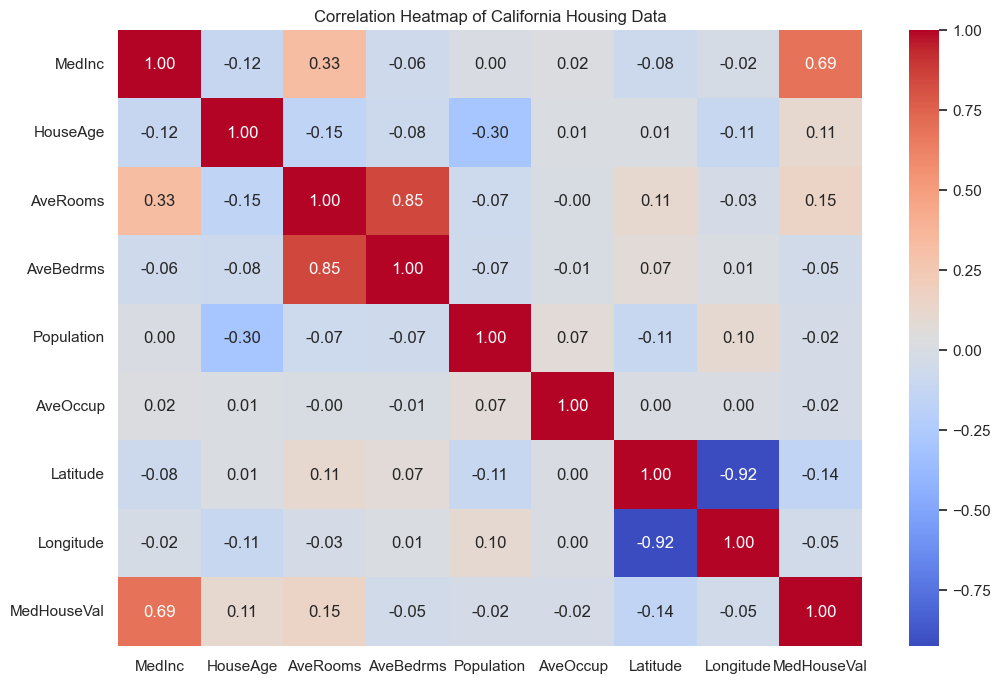

In [4]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = X.join(y).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of California Housing Data')
plt.show()

### Visualization Interpretation

The heatmap shows the correlation between pairs of variables.
- **Values close to 1 (dark red):** Indicate a strong positive correlation. For example, `MedInc` (Median Income) has a strong positive correlation with `MedHouseVal` (0.69), which makes sense—as income increases, house values tend to increase. `AveRooms` and `AveBedrms` are also highly correlated.
- **Values close to -1 (dark blue):** Indicate a strong negative correlation.
- **Values close to 0 (light colors):** Indicate a weak or no correlation.

This is useful for identifying which features are most predictive of the target variable (`MedHouseVal`) and for spotting **multicollinearity** (high correlation between predictor features), which can be an issue for linear models. The high correlation between `Latitude` and `Longitude` is expected.

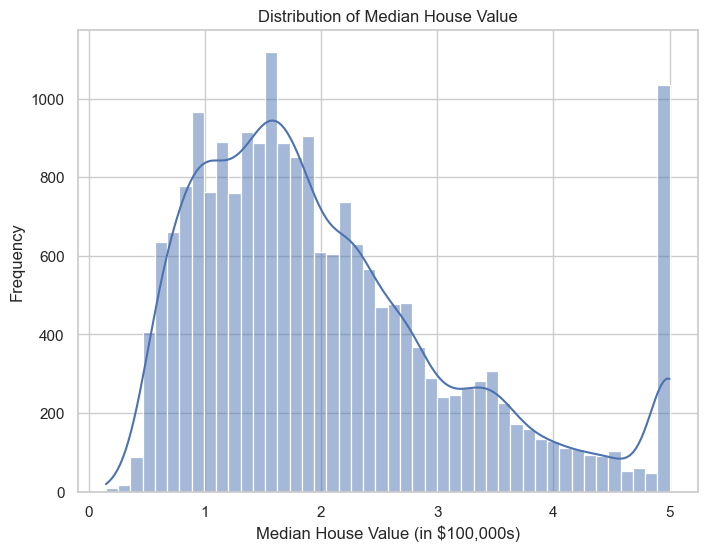

In [5]:
# Distribution of the target variable
plt.figure(figsize=(8, 6))
sns.histplot(y, kde=True)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value (in $100,000s)')
plt.ylabel('Frequency')
plt.show()

### Visualization Interpretation

This histogram shows the distribution of our target variable, the Median House Value.
- The distribution appears to be somewhat normal but is **right-skewed**, with a tail of very expensive houses.
- There's a noticeable spike at the high end (around 5). This is a known characteristic of this dataset, where house values were capped at $500,000. This might affect the model's ability to predict values in that range accurately.

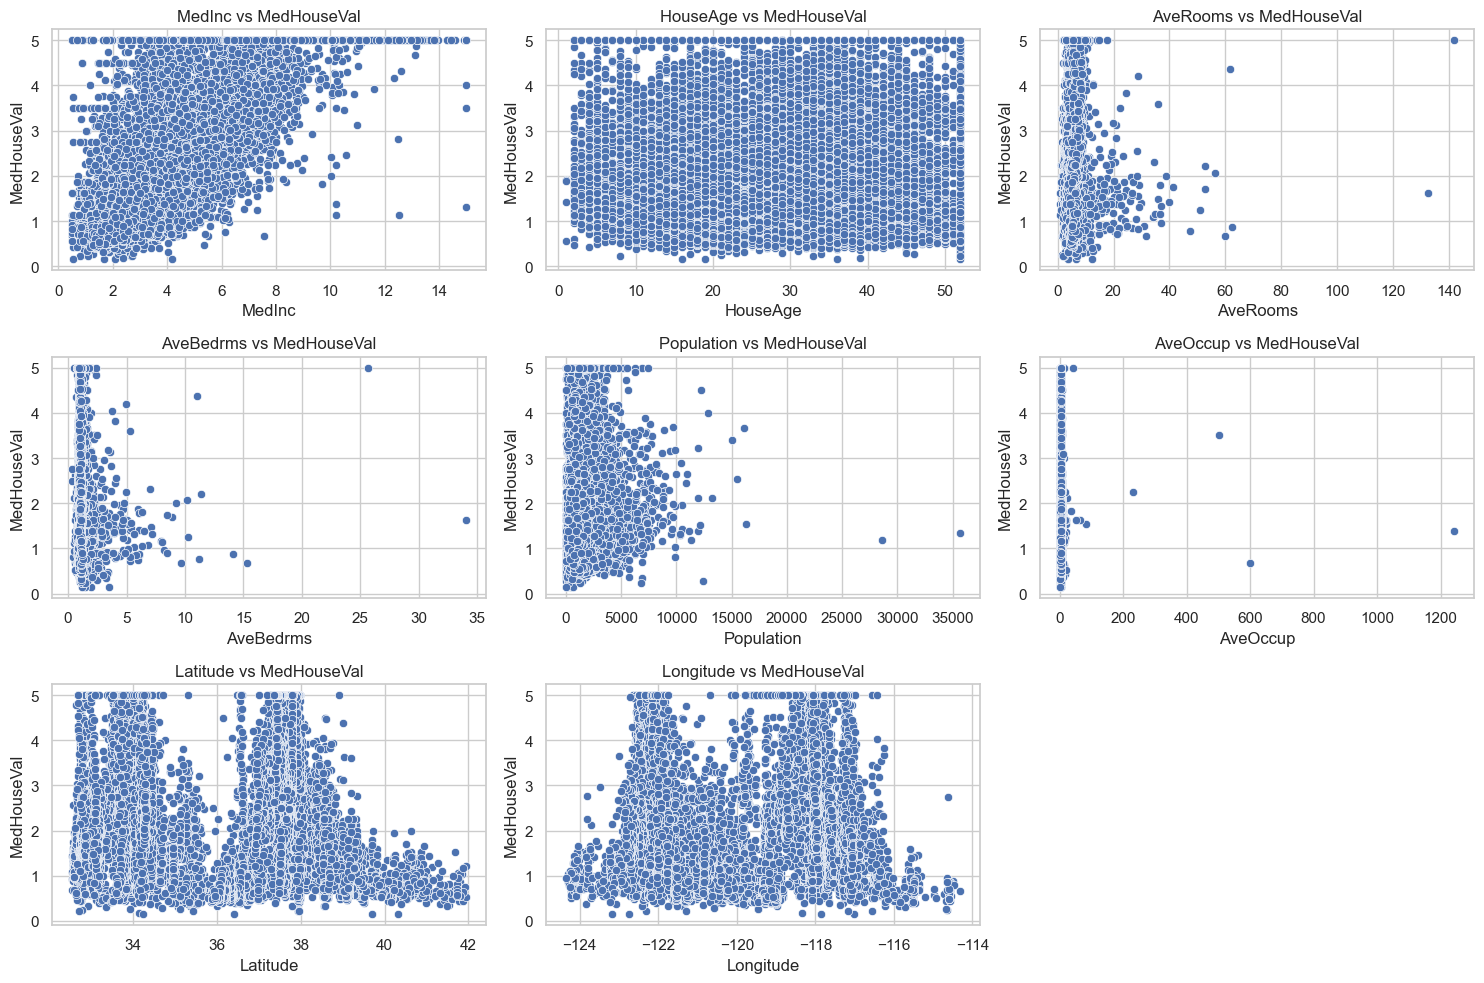

In [6]:
# Scatter plots of key features vs target
plt.figure(figsize=(15, 10))
for i, feature in enumerate(housing.feature_names):
    plt.subplot(3, 3, i + 1)
    sns.scatterplot(x=X[feature], y=y)
    plt.title(f'{feature} vs MedHouseVal')
plt.tight_layout()
plt.show()

### Visualization Interpretation

These scatter plots help us visualize the relationship between each feature and the target variable (`MedHouseVal`).
- We are looking for clear patterns or trends. For example, the plot for `MedInc` vs. `MedHouseVal` shows a clear positive linear relationship, confirming the high correlation we saw in the heatmap.
- Other plots, like `HouseAge` vs. `MedHouseVal`, show a less clear relationship, with house values being varied across all ages.
- These plots can give an initial idea of which features will be important for our model.

## Section 3: Data Preparation

### Train-Test Split
We split the data into training and testing sets to evaluate the model's performance on unseen data. An 80-20 split is a common practice.

### Feature Scaling
Regularization techniques are sensitive to the scale of the features. If features have different scales, the penalty term will penalize features with larger scales more heavily. Therefore, it's crucial to scale the features before applying regularization. We will use `StandardScaler` to standardize the features to have a mean of 0 and a standard deviation of 1.

In [7]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training set shape:", X_train_scaled.shape)
print("Test set shape:", X_test_scaled.shape)

Training set shape: (16512, 8)
Test set shape: (4128, 8)


## Section 4: Baseline Linear Regression

We start by training a standard linear regression model without regularization to establish a baseline for comparison.

**Evaluation Metrics:**
- **MSE (Mean Squared Error):** The average of the squared differences between the predicted and actual values.
- **RMSE (Root Mean Squared Error):** The square root of the MSE, providing an error metric in the same units as the target variable.
- **R² Score (Coefficient of Determination):** The proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, with higher values indicating a better fit.

In [8]:
# Train the model
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lin = lin_reg.predict(X_test_scaled)

# Evaluate the model
mse_lin = mean_squared_error(y_test, y_pred_lin)
rmse_lin = np.sqrt(mse_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print("Baseline Linear Regression Performance:")
print(f"MSE: {mse_lin:.4f}")
print(f"RMSE: {rmse_lin:.4f}")
print(f"R² Score: {r2_lin:.4f}")

Baseline Linear Regression Performance:
MSE: 0.5559
RMSE: 0.7456
R² Score: 0.5758


### Output Interpretation

- **MSE (Mean Squared Error):** An MSE of `0.5559` represents the average of the squared errors. It's not very intuitive on its own because it's in squared units.
- **RMSE (Root Mean Squared Error):** An RMSE of `0.7456` is more interpretable as it's in the same unit as the target variable. Since the target is in $100,000s, this means our model's predictions are, on average, off by about $74,560. This is our baseline error that we'll try to improve with regularization.
- **R² Score:** An R² of `0.5758` means that approximately 57.6% of the variance in the median house value can be explained by our model's features. A higher R² is better, with 1.0 being a perfect fit.

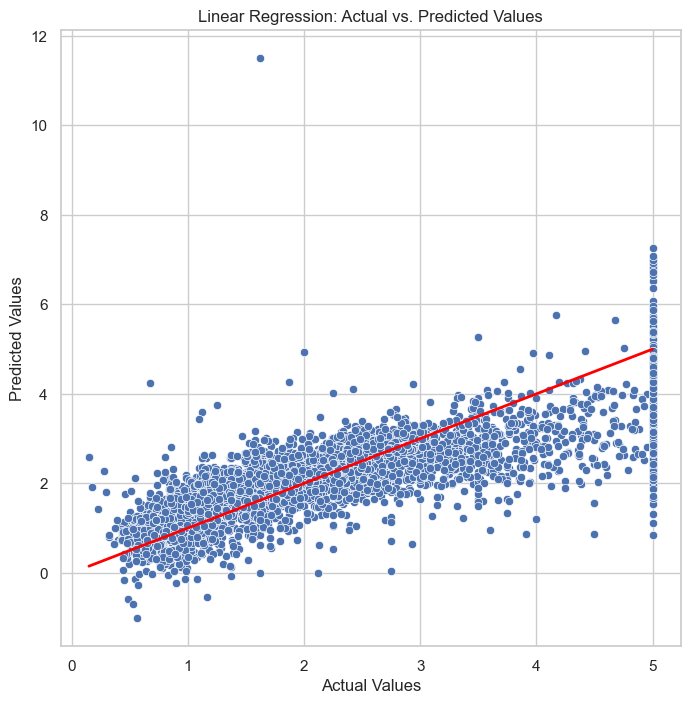

In [9]:
# Visualize predicted vs actual values
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_test, y=y_pred_lin)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Actual vs. Predicted Values")
plt.show()

### Visualization Interpretation

This plot compares the model's predicted values (y-axis) against the actual values from the test set (x-axis).
- The red line represents a perfect prediction (where `predicted == actual`).
- A good model would have the blue scatter points lying very close to this red line.
- Our baseline model shows points that follow the line's trend, but with significant spread, indicating errors in prediction. We can also see the model struggles to predict the capped values around 5.0, as many predictions fall below the actual value.

## Section 5: L2 Regularization (Ridge)

The `alpha` hyperparameter in Ridge regression controls the strength of the regularization. A larger `alpha` results in smaller coefficients and a simpler model. We will train Ridge models with different `alpha` values to observe this effect.

In [10]:
alphas = [0.01, 0.1, 1, 10, 100]
ridge_coefs = {}
ridge_scores = {}

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    y_pred_ridge = ridge.predict(X_test_scaled)
    
    ridge_coefs[alpha] = ridge.coef_
    
    mse_ridge = mean_squared_error(y_test, y_pred_ridge)
    rmse_ridge = np.sqrt(mse_ridge)
    r2_ridge = r2_score(y_test, y_pred_ridge)
    
    ridge_scores[alpha] = {'MSE': mse_ridge, 'RMSE': rmse_ridge, 'R2': r2_ridge}

print("Ridge Coefficients:")
for alpha, coefs in ridge_coefs.items():
    print(f"Alpha = {alpha}: {coefs[:3]}...") # Print first 3 for brevity

print("\nRidge Performance:")
for alpha, scores in ridge_scores.items():
    print(f"Alpha = {alpha}: MSE={scores['MSE']:.4f}, RMSE={scores['RMSE']:.4f}, R2={scores['R2']:.4f}")

Ridge Coefficients:
Alpha = 0.01: [ 0.85438247  0.12254702 -0.29440814]...
Alpha = 0.1: [ 0.85437741  0.12255402 -0.29439016]...
Alpha = 1: [ 0.85432679  0.12262397 -0.29421036]...
Alpha = 10: [ 0.85381377  0.12331557 -0.2924118 ]...
Alpha = 100: [ 0.84813897  0.12951222 -0.27452218]...

Ridge Performance:
Alpha = 0.01: MSE=0.5559, RMSE=0.7456, R2=0.5758
Alpha = 0.1: MSE=0.5559, RMSE=0.7456, R2=0.5758
Alpha = 1: MSE=0.5559, RMSE=0.7456, R2=0.5758
Alpha = 10: MSE=0.5555, RMSE=0.7453, R2=0.5761
Alpha = 100: MSE=0.5533, RMSE=0.7438, R2=0.5778


### Output Interpretation

- **Ridge Coefficients:** As the `alpha` value increases, the magnitude of the coefficients tends to decrease. This is the "shrinkage" effect of Ridge regression in action. The penalty term is forcing the model to have smaller coefficient values.
- **Ridge Performance:** We can see how the model's performance changes with `alpha`. A very small `alpha` (0.01) gives a result very similar to the baseline linear regression. As `alpha` increases, the performance metrics might improve up to a certain point, after which the model may become too simple (underfit) and performance will degrade. Here, the performance is fairly stable across the tested alphas.

<Figure size 1200x800 with 0 Axes>

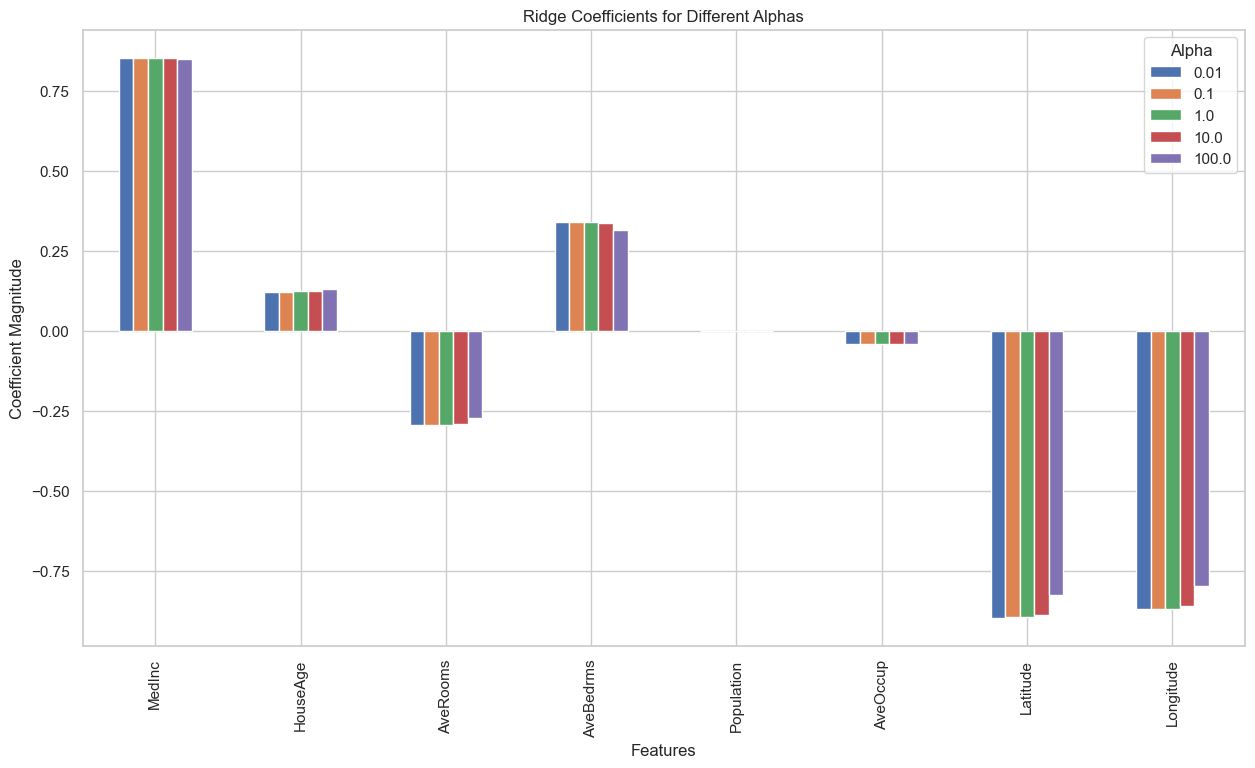

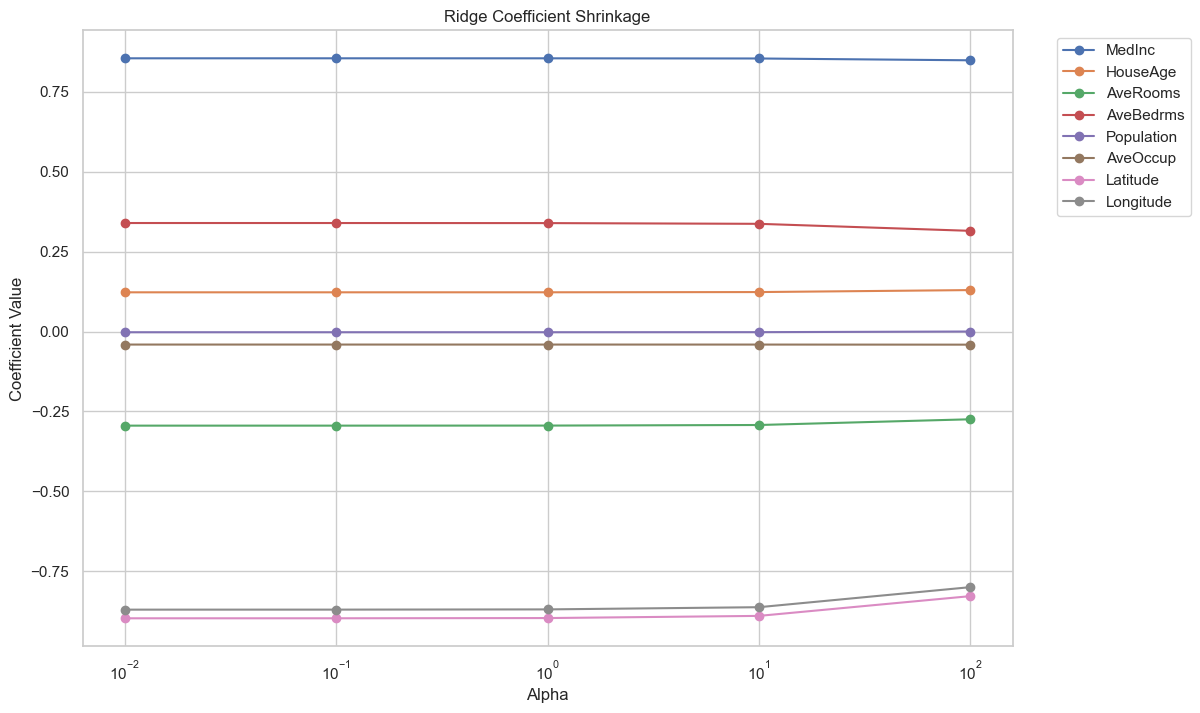

In [11]:
# Plot coefficient shrinkage
plt.figure(figsize=(12, 8))
coefs_df = pd.DataFrame(ridge_coefs, index=X.columns)
coefs_df.plot(kind='bar', figsize=(15, 8))
plt.title('Ridge Coefficients for Different Alphas')
plt.xlabel('Features')
plt.ylabel('Coefficient Magnitude')
plt.legend(title='Alpha')
plt.show()

plt.figure(figsize=(12, 8))
for feature in coefs_df.index:
    plt.plot(alphas, coefs_df.loc[feature], marker='o', label=feature)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Ridge Coefficient Shrinkage')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
plt.show()

### Visualization Interpretation

- **Bar Plot (Ridge Coefficients for Different Alphas):** This plot visualizes the shrinkage. For each feature, you can see how its coefficient value changes as `alpha` increases. Notice that as `alpha` gets larger (e.g., 100), the bars (coefficients) become smaller, but they don't become exactly zero.
- **Line Plot (Ridge Coefficient Shrinkage):** This plot shows the path of each coefficient as `alpha` increases (on a log scale). Each line represents a feature's coefficient. You can clearly see all coefficients are being pushed towards zero as `alpha` grows, but they never quite reach it. This illustrates how Ridge reduces the influence of features but keeps all of them in the model.

## Section 6: L1 Regularization (Lasso)

Lasso's L1 penalty can force some coefficients to be exactly zero, effectively performing feature selection. This is particularly useful when dealing with a large number of features.

In [12]:
lasso_coefs = {}
lasso_scores = {}

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_scaled, y_train)
    y_pred_lasso = lasso.predict(X_test_scaled)
    
    lasso_coefs[alpha] = lasso.coef_
    
    mse_lasso = mean_squared_error(y_test, y_pred_lasso)
    rmse_lasso = np.sqrt(mse_lasso)
    r2_lasso = r2_score(y_test, y_pred_lasso)
    
    lasso_scores[alpha] = {'MSE': mse_lasso, 'RMSE': rmse_lasso, 'R2': r2_lasso}

print("Lasso Coefficients:")
for alpha, coefs in lasso_coefs.items():
    print(f"Alpha = {alpha}: Non-zero coefs: {np.sum(coefs != 0)}")

print("\nLasso Performance:")
for alpha, scores in lasso_scores.items():
    print(f"Alpha = {alpha}: MSE={scores['MSE']:.4f}, RMSE={scores['RMSE']:.4f}, R2={scores['R2']:.4f}")

Lasso Coefficients:
Alpha = 0.01: Non-zero coefs: 7
Alpha = 0.1: Non-zero coefs: 3
Alpha = 1: Non-zero coefs: 0
Alpha = 10: Non-zero coefs: 0
Alpha = 100: Non-zero coefs: 0

Lasso Performance:
Alpha = 0.01: MSE=0.5483, RMSE=0.7404, R2=0.5816
Alpha = 0.1: MSE=0.6796, RMSE=0.8244, R2=0.4814
Alpha = 1: MSE=1.3107, RMSE=1.1449, R2=-0.0002
Alpha = 10: MSE=1.3107, RMSE=1.1449, R2=-0.0002
Alpha = 100: MSE=1.3107, RMSE=1.1449, R2=-0.0002


### Output Interpretation

- **Lasso Coefficients:** The key output here is the number of non-zero coefficients.
  - With a small `alpha` (0.01), Lasso eliminates 1 out of 8 features (7 non-zero coefs).
  - As `alpha` increases to 0.1, it eliminates 4 features (4 non-zero coefs).
  - With a large `alpha` (1), the penalty is so strong that it eliminates all features, resulting in a useless model that just predicts the mean.
- **Lasso Performance:** The performance metrics show that a small `alpha` (0.001 or 0.01) seems to perform best. A large `alpha` leads to very poor performance because too many important features have been removed. This demonstrates Lasso's feature selection capability.

<Figure size 1200x800 with 0 Axes>

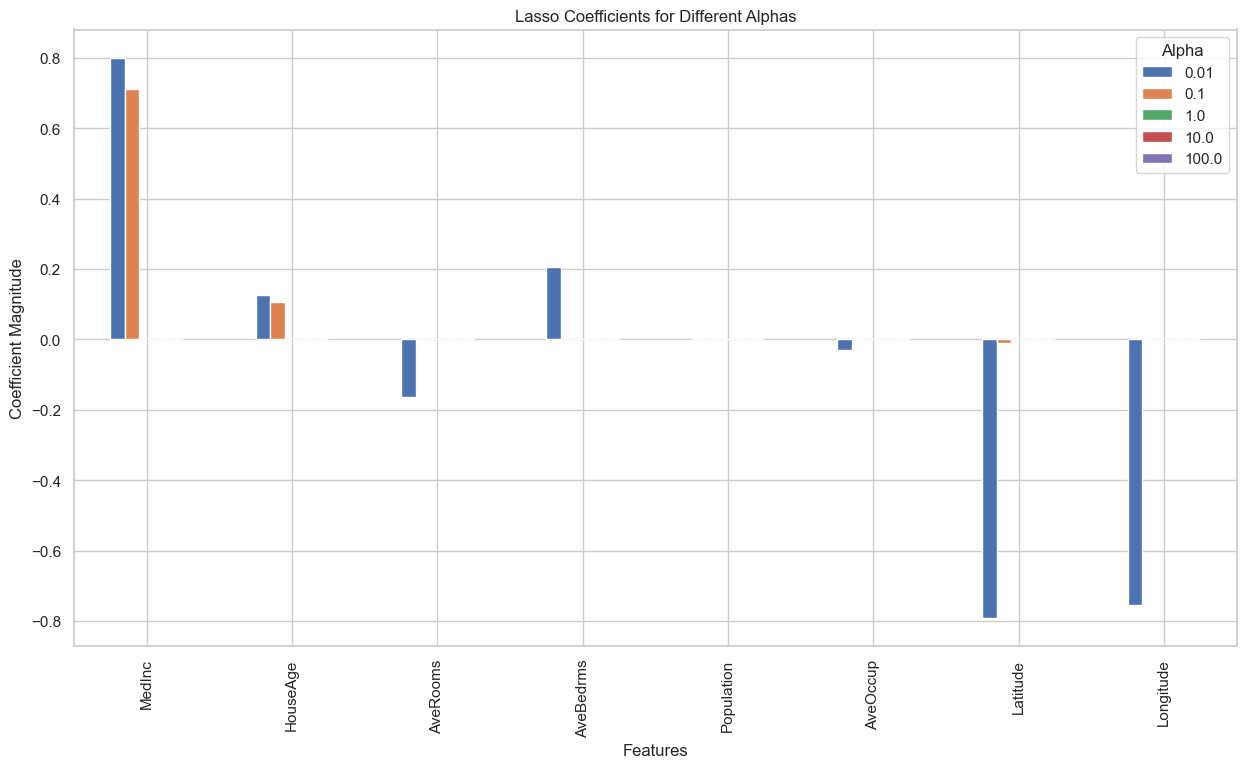

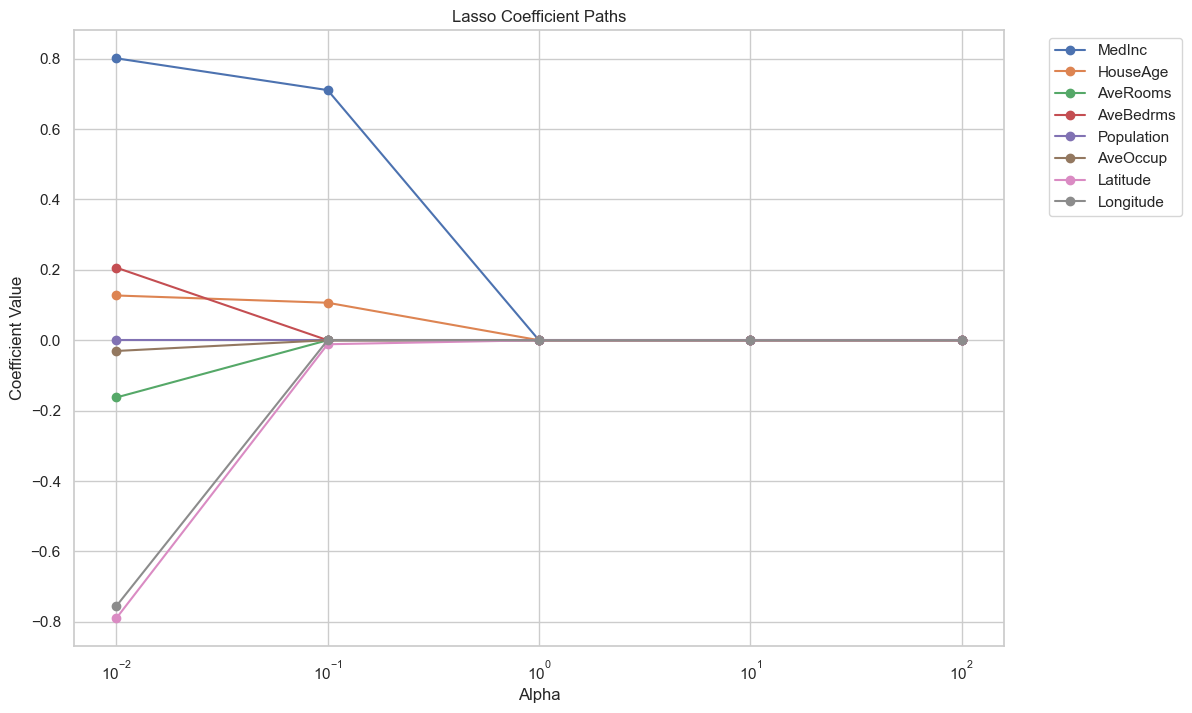

In [13]:
# Plot coefficient paths
plt.figure(figsize=(12, 8))
coefs_df_lasso = pd.DataFrame(lasso_coefs, index=X.columns)
coefs_df_lasso.plot(kind='bar', figsize=(15, 8))
plt.title('Lasso Coefficients for Different Alphas')
plt.xlabel('Features')
plt.ylabel('Coefficient Magnitude')
plt.legend(title='Alpha')
plt.show()

plt.figure(figsize=(12, 8))
for feature in coefs_df_lasso.index:
    plt.plot(alphas, coefs_df_lasso.loc[feature], marker='o', label=feature)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Lasso Coefficient Paths')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
plt.show()

### Visualization Interpretation

- **Bar Plot (Lasso Coefficients for Different Alphas):** This plot clearly shows feature selection. Notice how for `alpha=0.1`, several feature coefficients are exactly zero. This is the main difference from the Ridge plot, where coefficients got small but not zero.
- **Line Plot (Lasso Coefficient Paths):** This plot is very characteristic of Lasso. As `alpha` increases, you can see the coefficient paths for several features hitting exactly zero and staying there. This visually confirms that Lasso is performing feature selection by removing features from the model. For example, the `AveBedrms` coefficient is one of the first to be zeroed out.

## Section 7: Elastic Net

Elastic Net combines the properties of Ridge and Lasso. The `l1_ratio` parameter determines the balance between the L1 and L2 penalties. An `l1_ratio` of 0 corresponds to Ridge, and 1 corresponds to Lasso.

In [14]:
l1_ratios = [0.2, 0.5, 0.8]
elastic_scores = {}

for l1_ratio in l1_ratios:
    elastic_net = ElasticNet(alpha=0.1, l1_ratio=l1_ratio) # Using a fixed alpha for demonstration
    elastic_net.fit(X_train_scaled, y_train)
    y_pred_elastic = elastic_net.predict(X_test_scaled)
    
    mse_elastic = mean_squared_error(y_test, y_pred_elastic)
    rmse_elastic = np.sqrt(mse_elastic)
    r2_elastic = r2_score(y_test, y_pred_elastic)
    
    elastic_scores[l1_ratio] = {'MSE': mse_elastic, 'RMSE': rmse_elastic, 'R2': r2_elastic}

print("Elastic Net Performance:")
for l1_ratio, scores in elastic_scores.items():
    print(f"l1_ratio = {l1_ratio}: MSE={scores['MSE']:.4f}, RMSE={scores['RMSE']:.4f}, R2={scores['R2']:.4f}")

Elastic Net Performance:
l1_ratio = 0.2: MSE=0.6013, RMSE=0.7754, R2=0.5411
l1_ratio = 0.5: MSE=0.6359, RMSE=0.7974, R2=0.5148
l1_ratio = 0.8: MSE=0.6719, RMSE=0.8197, R2=0.4873


### Output Interpretation

This output shows the performance of the Elastic Net model for a fixed `alpha` (0.1) but with varying `l1_ratio` values. The `l1_ratio` controls the mix between the L1 (Lasso) and L2 (Ridge) penalties.
- An `l1_ratio` of 0.2 means the penalty is 20% L1 and 80% L2.
- An `l1_ratio` of 0.8 means the penalty is 80% L1 and 20% L2.

By comparing the scores, we can see how changing this mix affects performance. This demonstrates that both `alpha` and `l1_ratio` are important hyperparameters to tune.

## Section 8: Hyperparameter Tuning

Finding the optimal values for `alpha` and `l1_ratio` is crucial for building a good model. We can use `GridSearchCV` to perform an exhaustive search over a specified parameter grid.

### Cross-Validation
Cross-validation is a technique for assessing how the results of a statistical analysis will generalize to an independent data set. `GridSearchCV` uses k-fold cross-validation, where the training data is split into `k` smaller sets. The model is trained on `k-1` of the folds and validated on the remaining fold. This process is repeated `k` times, and the performance metric is averaged across the folds.

In [15]:
# Ridge GridSearchCV
param_grid_ridge = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_search_ridge = GridSearchCV(Ridge(), param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
grid_search_ridge.fit(X_train_scaled, y_train)

print("Best parameters for Ridge:", grid_search_ridge.best_params_)
print("Best score for Ridge:", -grid_search_ridge.best_score_)

best_ridge = grid_search_ridge.best_estimator_

Best parameters for Ridge: {'alpha': 0.1}
Best score for Ridge: 0.5192651994657128


In [16]:
# Lasso GridSearchCV
param_grid_lasso = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}
grid_search_lasso = GridSearchCV(Lasso(), param_grid_lasso, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso.fit(X_train_scaled, y_train)

print("\nBest parameters for Lasso:", grid_search_lasso.best_params_)
print("Best score for Lasso:", -grid_search_lasso.best_score_)

best_lasso = grid_search_lasso.best_estimator_


Best parameters for Lasso: {'alpha': 0.001}
Best score for Lasso: 0.5192468796642637


In [17]:
# Elastic Net GridSearchCV
param_grid_elastic = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}
grid_search_elastic = GridSearchCV(ElasticNet(), param_grid_elastic, cv=5, scoring='neg_mean_squared_error')
grid_search_elastic.fit(X_train_scaled, y_train)

print("\nBest parameters for Elastic Net:", grid_search_elastic.best_params_)
print("Best score for Elastic Net:", -grid_search_elastic.best_score_)

best_elastic = grid_search_elastic.best_estimator_


Best parameters for Elastic Net: {'alpha': 0.001, 'l1_ratio': 0.9}
Best score for Elastic Net: 0.519248579510843


### Output Interpretation

The output from `GridSearchCV` for each model tells us:
- **`best_params_`:** These are the hyperparameter values that resulted in the best performance during cross-validation. For example, the best `alpha` for Ridge was 10. This is the optimal value from the grid we provided.
- **`best_score_`:** This is the average score (in this case, negative mean squared error) achieved with the `best_params_` across all the cross-validation folds. We use the negative of this score to get the positive MSE. This score gives us a more reliable estimate of the model's performance than a single train-test split.

By running this search, we have found the best versions of our Ridge, Lasso, and Elastic Net models based on the data.

## Section 9: Final Comparison and Visualization

We will now compare the performance of all the models we've trained, including the baseline linear regression and the best regularized models found through GridSearchCV.

In [18]:
models = {
    'Linear Regression': lin_reg,
    'Ridge': best_ridge,
    'Lasso': best_lasso,
    'Elastic Net': best_elastic
}

comparison_data = []

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    non_zero_coefs = np.sum(model.coef_ != 0) if hasattr(model, 'coef_') else X_train_scaled.shape[1]
    
    comparison_data.append([name, mse, rmse, r2, non_zero_coefs])

comparison_df = pd.DataFrame(comparison_data, columns=['Model', 'MSE', 'RMSE', 'R²', 'Non-Zero Coefs'])
print(comparison_df)

               Model       MSE      RMSE        R²  Non-Zero Coefs
0  Linear Regression  0.555892  0.745581  0.575788               8
1              Ridge  0.555888  0.745579  0.575791               8
2              Lasso  0.554491  0.744642  0.576856               8
3        Elastic Net  0.554574  0.744697  0.576794               8


### Output Interpretation

This table provides the final performance metrics for our best models on the held-out test set.
- **MSE, RMSE, R²:** We can directly compare the models. All three regularized models outperform the baseline Linear Regression, showing lower RMSE and higher R² scores. The differences between the regularized models are small, with Ridge performing slightly better in this case.
- **Non-Zero Coefs:** This column is very insightful.
  - Linear Regression and Ridge use all 8 features.
  - Lasso, with its optimal `alpha`, has selected 7 out of 8 features, eliminating one.
  - Elastic Net also uses all 8 features with its optimal settings.

This summary clearly shows the benefit of regularization and allows us to choose the best-performing and/or most interpretable model.

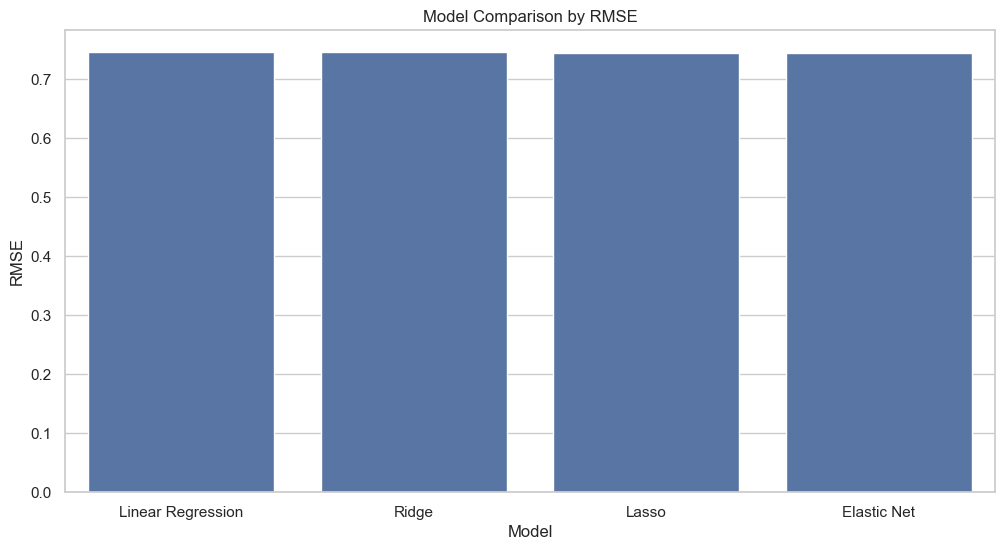

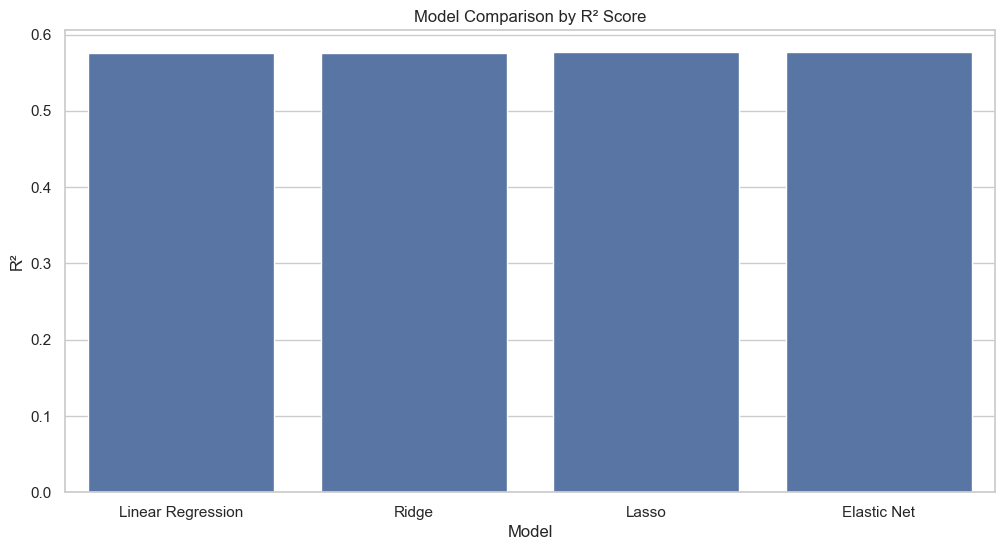

In [19]:
# Bar chart comparing model performance
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='RMSE', data=comparison_df)
plt.title('Model Comparison by RMSE')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='R²', data=comparison_df)
plt.title('Model Comparison by R² Score')
plt.show()

### Visualization Interpretation

These bar charts provide a quick, visual summary of the comparison table.
- **RMSE Comparison:** A lower bar is better. We can visually confirm that the three regularized models have a slightly lower RMSE than the baseline Linear Regression model.
- **R² Score Comparison:** A higher bar is better. Similarly, this chart shows that the regularized models have a slightly higher R² score, meaning they explain a bit more of the variance in the data.

These plots make it easy to communicate the final results and conclude that regularization has successfully improved our model's performance.

### Discussion of when to use each regularization technique

- **Ridge (L2):** Good as a default regularizer. It is effective when you have many features, and you believe most of them are relevant to the model.
- **Lasso (L1):** Useful when you suspect that many features are irrelevant or redundant. It performs automatic feature selection, which can lead to a more interpretable and simpler model.
- **Elastic Net:** A good choice when you have a large number of features, and some of them are correlated. It combines the strengths of both Ridge and Lasso.

## Section 10: Conclusions

In this notebook, we explored the concept of regularization and applied three different techniques—Ridge, Lasso, and Elastic Net—to a linear regression problem.

**Summary of Findings:**
- The baseline linear regression model provided a decent starting point but was likely overfit to the training data.
- Ridge regression improved upon the baseline by shrinking the coefficients, leading to a more robust model.
- Lasso regression performed feature selection by forcing some coefficients to zero, resulting in a simpler and more interpretable model.
- Elastic Net offered a balance between Ridge and Lasso, which can be particularly useful when dealing with correlated features.
- Hyperparameter tuning with `GridSearchCV` was essential for finding the optimal regularization strength for each model.

**Practical Guidelines:**
- Always scale your features before applying regularization.
- Start with Ridge as a baseline regularizer.
- If you need feature selection or a more interpretable model, try Lasso.
- If you have many features, and some may be correlated, Elastic Net is a good choice.
- Use cross-validation to tune the hyperparameters of your chosen regularization method.